# How to become a top earner in Airbnb?

## Some useful packages, self-buildfunctions and plotly functions

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
from collections import Counter
from scipy.stats.stats import pearsonr
from string import ascii_letters

In [3]:
# 画图
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

In [4]:
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

### Import files

In [6]:
csvs = glob.glob('*.csv')

In [7]:
csvs

['reviews.csv', 'listings.csv', 'calendar.csv']

In [8]:
base = pd.read_csv(csvs[1])
listings_df = base.copy()
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


### Create a new metrics
    -  new_score_reviews: a feature of (reviews_per_month * review_scores_rating)/10
    -  as an approach to know which listings have more completed orders than someone else and great review from guests as well

In [9]:
listings_df['new_score_reviews2'] = listings_df['reviews_per_month'] * listings_df['review_scores_rating'] / 10
listings_df['new_score_reviews2'].fillna(0, inplace=True)

#### Decide the threshold of Top Performer and Low Performer listings

In [10]:
top90flag = listings_df['new_score_reviews2'].quantile(0.9)
upto25flag = listings_df['new_score_reviews2'].quantile(0.25)

In [11]:
listings_df['top90'] = listings_df.new_score_reviews2 >= top90flag
listings_df['upto25'] = listings_df.new_score_reviews2 <= upto25flag

### Visualize the defined class

In [12]:
def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value

In [13]:
listings_df['score_ranges'] = listings_df['new_score_reviews2'].apply(rangeScore)

In [14]:
listings_df['score_ranges'].head()

0    30-40
1    10-20
2    10-20
3     0-10
4     0-10
Name: score_ranges, dtype: object

In [15]:
# table coloring purpose
top90 = listings_df.groupby('score_ranges', as_index=False)['top90'].max(key='count').rename(columns={'score_ranges':'Score'})
upto25 = listings_df.groupby('score_ranges', as_index=False)['upto25'].max(key='count').rename(columns={'score_ranges':'Score'})

In [16]:
# count distribitons of score bins
barplot = listings_df[['id', 'new_score_reviews2']]

barplot['Qty'] = barplot['new_score_reviews2'].apply(rangeScore)

barplot = barplot.Qty.value_counts(sort=True).to_frame().reset_index()

barplot = barplot.rename(columns={'index': 'Score'})

In [17]:
barplot

,Score,Qty
0,0-10,1822
1,10-20,748
2,20-30,498
3,30-40,332
4,40-50,199
5,50-60,110
6,60-70,51
7,70-80,32
8,80-90,14
9,90-100,8


In [18]:
top90

,Score,top90
0,0-10,False
1,10-20,False
2,100+,True
3,20-30,False
4,30-40,False
5,40-50,True
6,50-60,True
7,60-70,True
8,70-80,True
9,80-90,True


In [19]:
upto25

,Score,upto25
0,0-10,True
1,10-20,False
2,100+,False
3,20-30,False
4,30-40,False
5,40-50,False
6,50-60,False
7,60-70,False
8,70-80,False
9,80-90,False


In [20]:
# merging color flag
barplot = barplot.merge(top90, on='Score')
barplot = barplot.merge(upto25)

In [21]:
barplot

,Score,Qty,top90,upto25
0,0-10,1822,False,True
1,10-20,748,False,False
2,20-30,498,False,False
3,30-40,332,False,False
4,40-50,199,True,False
5,50-60,110,True,False
6,60-70,51,True,False
7,70-80,32,True,False
8,80-90,14,True,False
9,90-100,8,True,False


In [22]:
# creating color for the vis
barplot['color'] = barplot.top90.apply(lambda x: 'mediumaquamarine' if x else 'lightgray')

# manually change the color of the first index become crimson, to indicate the class of low performer listings
barplot.iloc[0, 4] = 'crimson'

In [23]:
barplot

,Score,Qty,top90,upto25,color
0,0-10,1822,False,True,crimson
1,10-20,748,False,False,lightgray
2,20-30,498,False,False,lightgray
3,30-40,332,False,False,lightgray
4,40-50,199,True,False,mediumaquamarine
5,50-60,110,True,False,mediumaquamarine
6,60-70,51,True,False,mediumaquamarine
7,70-80,32,True,False,mediumaquamarine
8,80-90,14,True,False,mediumaquamarine
9,90-100,8,True,False,mediumaquamarine


In [24]:
# change Score column and Qty column into x and y for the vis purpose
barplot = barplot.rename(columns={'Score': 'x', 'Qty': 'y'})

In [25]:
# Annotations
title_text = ['<b>Comparison Listings Performance between Top Performer and Low Performer</b>', 'Reviews per Month * Review Score Ratings / 10', 'Quantity of Listings']
annotations = [{'x':0.03, 'y':1900, 'text': 'Low Performer Had Score Up to 25 Percentile', 'color':'gray'}, {'x': 0.39, 'y': 300, 'text': 'Top Performer Had Score above 90 Percentile', 'color':'mediumaquamarine'}]

## Viz Functions

In [26]:
def gen_xaxis(title):
    """
    Creates the X Axis layout and title
    """
    xaxis = dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return xaxis


def gen_yaxis(title):
    """
    Creates the Y Axis layout and title
    """
    yaxis=dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return yaxis


def gen_layout(charttitle, xtitle, ytitle, lmarg, h, annotations=None):  
    """
    Creates whole layout, with both axis, annotations, size and margin
    """
    return go.Layout(title=charttitle, 
                     height=h, 
                     width=800,
                     showlegend=False,
                     xaxis=gen_xaxis(xtitle), 
                     yaxis=gen_yaxis(ytitle),
                     annotations = annotations,
                     margin=dict(l=lmarg),
                    )


def gen_bars(data, color, orient):
    """
    Generates the bars for plotting, with their color and orient
    """
    bars = []
    for label, label_df in data.groupby(color):
        if orient == 'h':
            label_df = label_df.sort_values(by='x', ascending=True)
        if label == 'a':
            label = 'lightgray'
        bars.append(go.Bar(x=label_df.x,
                           y=label_df.y,
                           name=label,
                           marker={'color': label},
                           orientation = orient
                          )
                   )
    return bars


def gen_annotations(annot):
    """
    Generates annotations to insert in the chart
    """
    if annot is None:
        return []
    
    annotations = []
    # Adding labels
    for d in annot:
        annotations.append(dict(xref='paper', x=d['x'], y=d['y'],
                           xanchor='left', yanchor='bottom',
                           text= d['text'],
                           font=dict(size=13,
                           color=d['color']),
                           showarrow=False))
    return annotations


def generate_barplot(text, annot_dict, orient='v', lmarg=120, h=400):
    """
    Generate the barplot with all data, using previous helper functions
    """
    layout = gen_layout(text[0], text[1], text[2], lmarg, h, gen_annotations(annot_dict))
    fig = go.Figure(data=gen_bars(barplot, 'color', orient=orient), layout=layout)
    return iplot(fig)

In [27]:
generate_barplot(title_text, annotations)

### Correlation between all reasonable features and the new_score_reviews2

In this phase, we excluded the useless columns, tidying some columns, change some dtypes, fill the null numbers, and select only numberic number that usefull for our correlations point.

In [28]:
# Some useless columns: url, and unique value all of the rows
unique_value_columns = []
url_columns = []

for i in listings_df.columns:
    if len((listings_df[i]).unique()) == 1:
        print('un-used column because same values: ', i, (listings_df[i].unique()))
        unique_value_columns.append(i)

    if 'url' in i:
        url_columns.append(i)

listings_df = listings_df.drop(url_columns+unique_value_columns, axis=1)

un-used column because same values:  scrape_id [20160104002432]
un-used column because same values:  last_scraped ['2016-01-04']
un-used column because same values:  experiences_offered ['none']
un-used column because same values:  market ['Seattle']
un-used column because same values:  country_code ['US']
un-used column because same values:  country ['United States']
un-used column because same values:  has_availability ['t']
un-used column because same values:  calendar_last_scraped ['2016-01-04']
un-used column because same values:  requires_license ['f']
un-used column because same values:  license [nan]
un-used column because same values:  jurisdiction_names ['WASHINGTON']


### Major Preprocessing Data, using self-built functions, fill null values, etc

In [29]:
listings_df.head(2)

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,new_score_reviews2,top90,upto25,score_ranges
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07,38.665,False,False,30-40
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48,14.208,False,False,10-20


In [30]:
def to_int(x):
    '''
    Columns value corrections
    '''
    if x == 'f':
        x = x.replace('f', '0')
    
    elif x == 't':
        x = x.replace('t', '1')
    
    else:
        x = '0'
    
    return int(x)

In [31]:
# Change the string of boolean into int
for i in listings_df.columns:
    if set(listings_df[i]) == {'t', 'f'}:
        listings_df[i] = listings_df[i].apply(to_int)
    elif set(listings_df[i]) == {'t', 'f', np.nan}:
        listings_df[i] = listings_df[i].apply(to_int)

In [33]:
def correction(x):
    '''
    Columns value corrections
    '''
    if type(x) == str:
        x = x.replace('$', '')
        x = x.replace(',', '')
        x=float(x)
    
    return (x)

In [34]:
# Dollar Corrections
listings_df['price'] = listings_df['price'].map(lambda x: correction(x))
listings_df['weekly_price'] = listings_df['weekly_price'].map(lambda x: correction(x))
listings_df['security_deposit'] = listings_df['security_deposit'].map(lambda x: correction(x))
listings_df['extra_people'] = listings_df['extra_people'].map(lambda x: correction(x))

In [35]:
def correction2(x):
    '''
    Columns value corrections
    '''
    if type(x) == str:
        x = x.replace('%', '')
        x = float(x)/100
    return (x)

In [36]:
# Change the rate percentage
listings_df['host_response_rate'] = listings_df['host_response_rate'].fillna('0%').apply(correction2)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].fillna('0%').apply(correction2)

In [37]:
def createAmenities(x):
    '''
    Convert the Amenities column into more analytical words
    '''
    val = x.replace('{','').replace('}','').replace('"','').replace(' ','_').replace(',',' ')
    val = val.split()
    
    return val

In [38]:
def changeTime(x):
    '''
    change host_response_time column from str to numerical
    '''
    if x == 'within an hour':
        x = '1'
    elif x == 'within a few hours':
        x = '4'
    elif x == 'within a day':
        x = '24'
    elif x == 'a few days or more':
        x = '48'
    else:
        x = '96'
    
    return x

In [39]:
# Change time indicators
listings_df['host_response_time'] = listings_df['host_response_time'].apply(changeTime).astype(int)

In [40]:
base['amenities'][0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [41]:
# Amenities change into reproduceable column
listings_df['amenities'] = base['amenities']
listings_df['array_amenities'] = listings_df['amenities'].apply(lambda x: createAmenities(x))
listings_df['len_amenities'] = listings_df['amenities'].apply(lambda x:len(createAmenities(x)))

In [42]:
# filling null values
listings_df['security_deposit'].fillna(0, inplace=True)
listings_df['cleaning_fee'].fillna(0, inplace=True)

In [43]:
# Some irrelevant columns personally
irrelevant_colmuns = ['id','host_id','host_listings_count','host_total_listings_count','latitude','longitude','is_location_exact','square_feet','price','weekly_price','monthly_price','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','require_guest_profile_picture','require_guest_phone_verification']
relevant_df = listings_df.drop(irrelevant_colmuns, axis=1)

### Correlation Plots

In [44]:
sns.set(style='white')

In [45]:
# Compute the correlation matrix
corr = relevant_df.corr()

In [46]:
corr

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,guests_included,extra_people,availability_365,instant_bookable,new_score_reviews2,top90,upto25,len_amenities
host_response_time,1.000000,-0.962645,-0.756382,-0.178543,-0.045793,-0.165406,-0.039606,0.004330,0.038552,-0.030204,-0.011743,-0.060387,-0.046078,-0.107282,-0.158575,-0.325291,-0.168052,0.337653,-0.153052
host_response_rate,-0.962645,1.000000,0.723693,0.179314,0.041092,0.167165,0.047155,0.001464,-0.025142,0.036803,-0.002129,0.062937,0.039950,0.085437,0.130720,0.306386,0.154195,-0.328804,0.156602
host_acceptance_rate,-0.756382,0.723693,1.000000,0.174225,0.056095,0.161052,0.035726,-0.018783,-0.052295,0.019145,-0.008218,0.027630,0.019998,0.096534,0.118533,0.335193,0.161620,-0.363774,0.127216
host_is_superhost,-0.178543,0.179314,0.174225,1.000000,0.011182,0.146076,-0.002904,-0.003718,-0.029034,-0.023481,0.052280,0.060375,0.041957,-0.014462,0.081923,0.329420,0.199705,-0.225068,0.104217
host_has_profile_pic,-0.045793,0.041092,0.056095,0.011182,1.000000,0.092873,0.008589,0.007658,0.016947,0.012415,-0.018998,0.012581,-0.010441,0.020962,-0.009062,0.027935,0.016208,-0.046660,-0.013410
host_identity_verified,-0.165406,0.167165,0.161052,0.146076,0.092873,1.000000,0.041221,-0.008665,-0.007219,0.014416,0.039393,0.033171,0.046521,0.022332,-0.001612,0.137262,0.061915,-0.176830,0.090715
accommodates,-0.039606,0.047155,0.035726,-0.002904,0.008589,0.041221,1.000000,0.538439,0.770974,0.861119,0.306412,0.532796,0.148390,-0.031535,0.024355,-0.103029,-0.076575,0.014862,0.269381
bathrooms,0.004330,0.001464,-0.018783,-0.003718,0.007658,-0.008665,0.538439,1.000000,0.610937,0.532838,0.239423,0.304780,0.079445,-0.002326,-0.049661,-0.138804,-0.089102,0.048377,0.140612
bedrooms,0.038552,-0.025142,-0.052295,-0.029034,0.016947,-0.007219,0.770974,0.610937,1.000000,0.753167,0.299891,0.457009,0.108857,-0.049788,-0.069222,-0.191699,-0.128964,0.080284,0.174195
beds,-0.030204,0.036803,0.019145,-0.023481,0.012415,0.014416,0.861119,0.532838,0.753167,1.000000,0.287679,0.460512,0.130843,-0.009773,0.024398,-0.119983,-0.087289,0.038723,0.220454


In [47]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

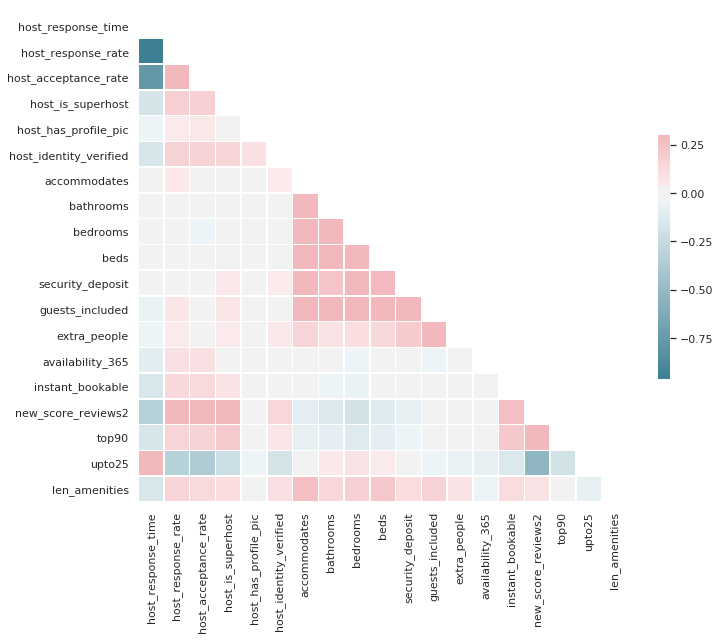

In [48]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

In [49]:
A = relevant_df.corr().unstack().sort_values(ascending=False)
print('The correlation of the new_score_reviews agains all')
print(A['new_score_reviews2'][1:])

The correlation of the new_score_reviews agains all
top90                     0.749421
host_acceptance_rate      0.335193
host_is_superhost         0.329420
host_response_rate        0.306386
instant_bookable          0.269035
host_identity_verified    0.137262
len_amenities             0.081900
extra_people              0.038126
availability_365          0.033179
host_has_profile_pic      0.027935
guests_included           0.003832
security_deposit         -0.075282
accommodates             -0.103029
beds                     -0.119983
bathrooms                -0.138804
bedrooms                 -0.191699
host_response_time       -0.325291
upto25                   -0.523813
dtype: float64


### Main features: host_acceptance_rate, host_is_superhost, host_repsonse_rate, instant_bookable, host_idntity_verified, len_amenities, and host_response_time

In [50]:
### define them into 2 dataframes
top_listings = listings_df[listings_df['new_score_reviews2'] >= np.percentile(listings_df['new_score_reviews2'], 90)]
low_listings = listings_df[listings_df['new_score_reviews2'] <= np.percentile(listings_df['new_score_reviews2'], 25)]

In [51]:
# Host Acceptance Rate DF
hostAR_top_performer = pd.DataFrame(top_listings['host_acceptance_rate'].reset_index(drop=True))
hostAR_top_performer['status'] = 'Top Performer'

hostAR_low_performer = pd.DataFrame(low_listings['host_acceptance_rate'].reset_index(drop=True))
hostAR_low_performer['status'] = 'Low Performer'

hostAR = hostAR_low_performer.append(hostAR_top_performer).sample(frac=1)

In [57]:
# Identity verified
identity_verified_top = pd.DataFrame(top_listings['host_identity_verified'].reset_index(drop=True))
identity_verified_top['status'] = 'Top Performer'

identity_verified_low = pd.DataFrame(low_listings['host_identity_verified'].reset_index(drop=True))
identity_verified_low['status'] = 'Low Performer'

identity_verified = identity_verified_low.append(identity_verified_top).sample(frac=1)

In [58]:
# Host is Superhost
superhost_top = pd.DataFrame(top_listings['host_is_superhost'].reset_index(drop=True))
superhost_top['status'] = 'Top Performer'

superhost_low = pd.DataFrame(low_listings['host_is_superhost'].reset_index(drop=True))
superhost_low['status'] = 'Low Performer'

superhost = superhost_low.append(superhost_top).sample(frac=1)

In [59]:
# Instant Bookable
instant_bookable_top = pd.DataFrame(top_listings['instant_bookable'].reset_index(drop=True))
instant_bookable_top['status'] = 'Top Performer'

instant_bookable_low = pd.DataFrame(low_listings['instant_bookable'].reset_index(drop=True))
instant_bookable_low['status'] = 'Low Performer'

instant_bookable = instant_bookable_low.append(instant_bookable_top).sample(frac=1)

In [61]:
def changeStr(x):
    '''
    change back the host_response_time from numerical to str
    '''
    if x == 1:
        x = 'within an hour'
    elif x == 4:
        x = 'within a few hours'
    elif x == 24:
        x = 'within a day'
    elif x == 48:
        x = 'a few days or more'
    elif x == 96:
        x = 'Not Response'
    
    return x

In [62]:
# Host Response Time
top_listings['host_response_time_str'] = top_listings['host_response_time'].apply(changeStr)
low_listings['host_response_time_str'] = low_listings['host_response_time'].apply(changeStr)

host_response_top = pd.DataFrame(top_listings['host_response_time_str'].reset_index(drop=True))
host_response_top['status'] = 'Top Performer'

host_response_low = pd.DataFrame(low_listings['host_response_time_str'].reset_index(drop=True))
host_response_low['status'] = 'Low Performer'

host_response = host_response_low.append(host_response_top).sample(frac=1)

In [63]:
# Host Response Rate
host_responserate_top = pd.DataFrame(top_listings['host_response_rate'].reset_index(drop=True))
host_responserate_top['status'] = 'Top Performer'

host_responserate_low = pd.DataFrame(low_listings['host_response_rate'].reset_index(drop=True))
host_responserate_low['status'] = 'Low Performer'

host_responserate = host_responserate_low.append(host_responserate_top).sample(frac=1)

In [68]:
# Percentage
percentage_low = list(host_responserate[host_responserate['status'] == 'Low Performer']['host_response_rate'].unique())
percentage_low.sort(reverse=True)

percentage_top = list(host_responserate[host_responserate['status'] == 'Top Performer']['host_response_rate'].unique())
percentage_top.sort(reverse=True)

host_responserate_fig = host_responserate[host_responserate['host_response_rate'].isin([1.0, 0.99, 0.96, 0.95, 0.94, 0.0])]

In [69]:
# Collecting data into one array
data = []

data.append(hostAR)
data.append(identity_verified)
data.append(superhost)
data.append(instant_bookable)
data.append(host_response)
data.append(host_responserate_fig)

### Visualization

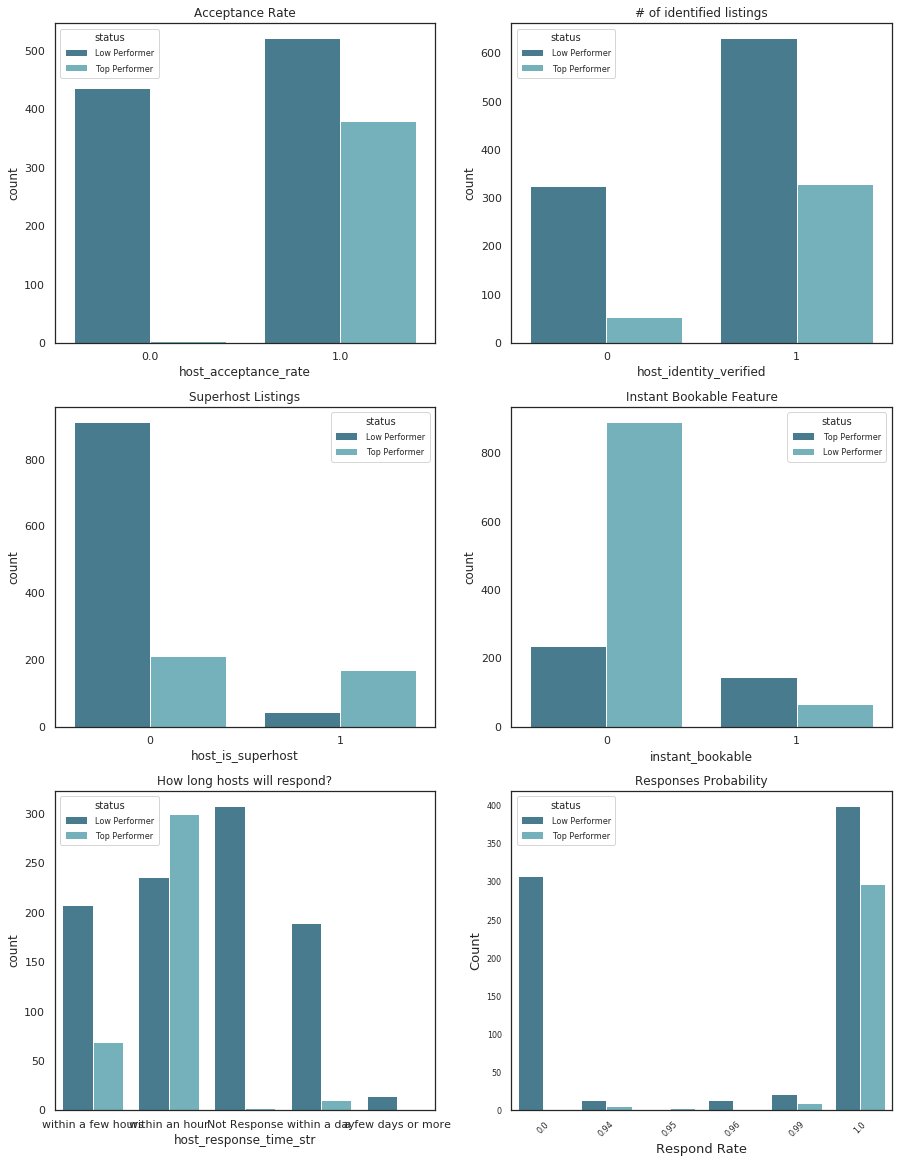

In [71]:
fig, ax = plt.subplots(figsize=(15, 20), nrows=3, ncols=2)

x_data = ['host_acceptance_rate','host_identity_verified','host_is_superhost','instant_bookable','host_response_time_str','host_response_rate']

title= ['Acceptance Rate','# of identified listings','Superhost Listings', 'Instant Bookable Feature', 'How long hosts will respond?' , 'Responses Probability']

x_axis= ['Percentage','Activate/Not','True/Not','Activate/Not', 'Respond Time', 'Respond Rate']

y_axis= ['Count']

cnt = 0

for x in range(3):
    for y in range(2):
        ax[x][y].set_title(title[cnt], fontsize=12)
        sns.countplot(x=x_data[cnt], hue='status', data=data[cnt], palette='GnBu_d', orient='h', ax=ax[x][y])
        plt.setp(ax[x][y].get_legend().get_texts(), fontsize='8')    # for legend text
        plt.setp(ax[x][y].get_legend().get_title(), fontsize='10')    # for legend title
        
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        
        plt.xlabel(x_axis[cnt], fontsize=13)
        p = plt.ylabel(y_axis[0], fontsize=13)
        
        cnt += 1

In [75]:
# Table preparations

viz1 = top_listings[['len_amenities', 'id']].groupby(['len_amenities']).count().sort_values(by='id', ascending=False).head(7)

viz1['percentage'] = viz1['id'] / viz1['id'].sum()

In [76]:
viz1

,id,percentage
len_amenities,,
15,38,0.163090
11,38,0.163090
18,36,0.154506
16,33,0.141631
17,31,0.133047
13,30,0.128755
12,27,0.115880


In [83]:
viz2 = low_listings[['len_amenities', 'id']].groupby(['len_amenities']).count().sort_values(by='id', ascending=False).head(7)
viz2['percentage'] = viz2['id'] / viz2['id'].sum()

In [84]:
viz2

,id,percentage
len_amenities,,
14,96,0.176796
12,94,0.173112
13,90,0.165746
15,78,0.143646
17,74,0.136280
16,56,0.103131
11,55,0.101289


In [85]:
ids = [room for room in top_listings['id']]

viz_base1 = listings_df[listings_df['id'].isin(ids)].reset_index(drop=True)

In [90]:
arr = []

for row in range(viz_base1.shape[0]):
    arr += viz_base1['array_amenities'][row]

In [91]:
arr

['Wireless_Internet',
 'Pets_live_on_this_property',
 'Dog(s)',
 'Heating',
 'Family/Kid_Friendly',
 'Essentials',
 'Shampoo',
 'Internet',
 'Wireless_Internet',
 'Pets_Allowed',
 'Breakfast',
 'Pets_live_on_this_property',
 'Cat(s)',
 'Heating',
 'Washer',
 'Dryer',
 'Smoke_Detector',
 'Carbon_Monoxide_Detector',
 'First_Aid_Kit',
 'Essentials',
 'Shampoo',
 'Wireless_Internet',
 'Free_Parking_on_Premises',
 'Heating',
 'Smoke_Detector',
 'Carbon_Monoxide_Detector',
 'Fire_Extinguisher',
 'Essentials',
 'Shampoo',
 'Wireless_Internet',
 'Pets_live_on_this_property',
 'Dog(s)',
 'Heating',
 'Family/Kid_Friendly',
 'Essentials',
 'TV',
 'Cable_TV',
 'Internet',
 'Wireless_Internet',
 'Air_Conditioning',
 'Kitchen',
 'Free_Parking_on_Premises',
 'Heating',
 'Family/Kid_Friendly',
 'Washer',
 'Dryer',
 'Smoke_Detector',
 'Carbon_Monoxide_Detector',
 'Fire_Extinguisher',
 'Essentials',
 'Shampoo',
 'TV',
 'Cable_TV',
 'Internet',
 'Wireless_Internet',
 'Kitchen',
 'Free_Parking_on_Premises

In [95]:
test3 = Counter(arr)

viz3 = test3.most_common(10)

viz3 = pd.DataFrame(viz3).rename(columns={0:'name', 1:'frequency'})

viz3['percentage'] = viz3['frequency'] / viz_base1.shape[0]
viz3.index = viz3['name']
viz3 = viz3.drop('name', axis=1)

In [96]:
viz3

,frequency,percentage
name,,
Wireless_Internet,375,0.981675
Heating,373,0.976440
Essentials,369,0.965969
Smoke_Detector,346,0.905759
Shampoo,342,0.895288
Kitchen,307,0.803665
Internet,296,0.774869
Carbon_Monoxide_Detector,282,0.738220
Dryer,260,0.680628


In [98]:
ids = [room for room in low_listings['id']]

viz_base2 = listings_df[listings_df['id'].isin(ids)].reset_index(drop=True)

arr = []

for row in range(viz_base2.shape[0]):
    arr += viz_base2['array_amenities'][row]

In [99]:
test4 = Counter(arr)

viz4 = test4.most_common(10)

viz4 = pd.DataFrame(viz4).rename(columns={0: 'name', 1:'frequency'})

viz4['percentage'] = viz4['frequency'] / viz_base2.shape[0]
viz4.index = viz4['name']
viz4 = viz4.drop('name', axis=1)

In [100]:
viz4

,frequency,percentage
name,,
Wireless_Internet,887,0.926855
Heating,871,0.910136
Kitchen,856,0.894462
Washer,778,0.812957
Dryer,772,0.806688
Smoke_Detector,750,0.783699
Essentials,729,0.761755
Internet,647,0.676071
TV,627,0.655172


Text(0.5, 1.0, 'The top miscellaneous provided by hosts (Top-Performer Listings)')

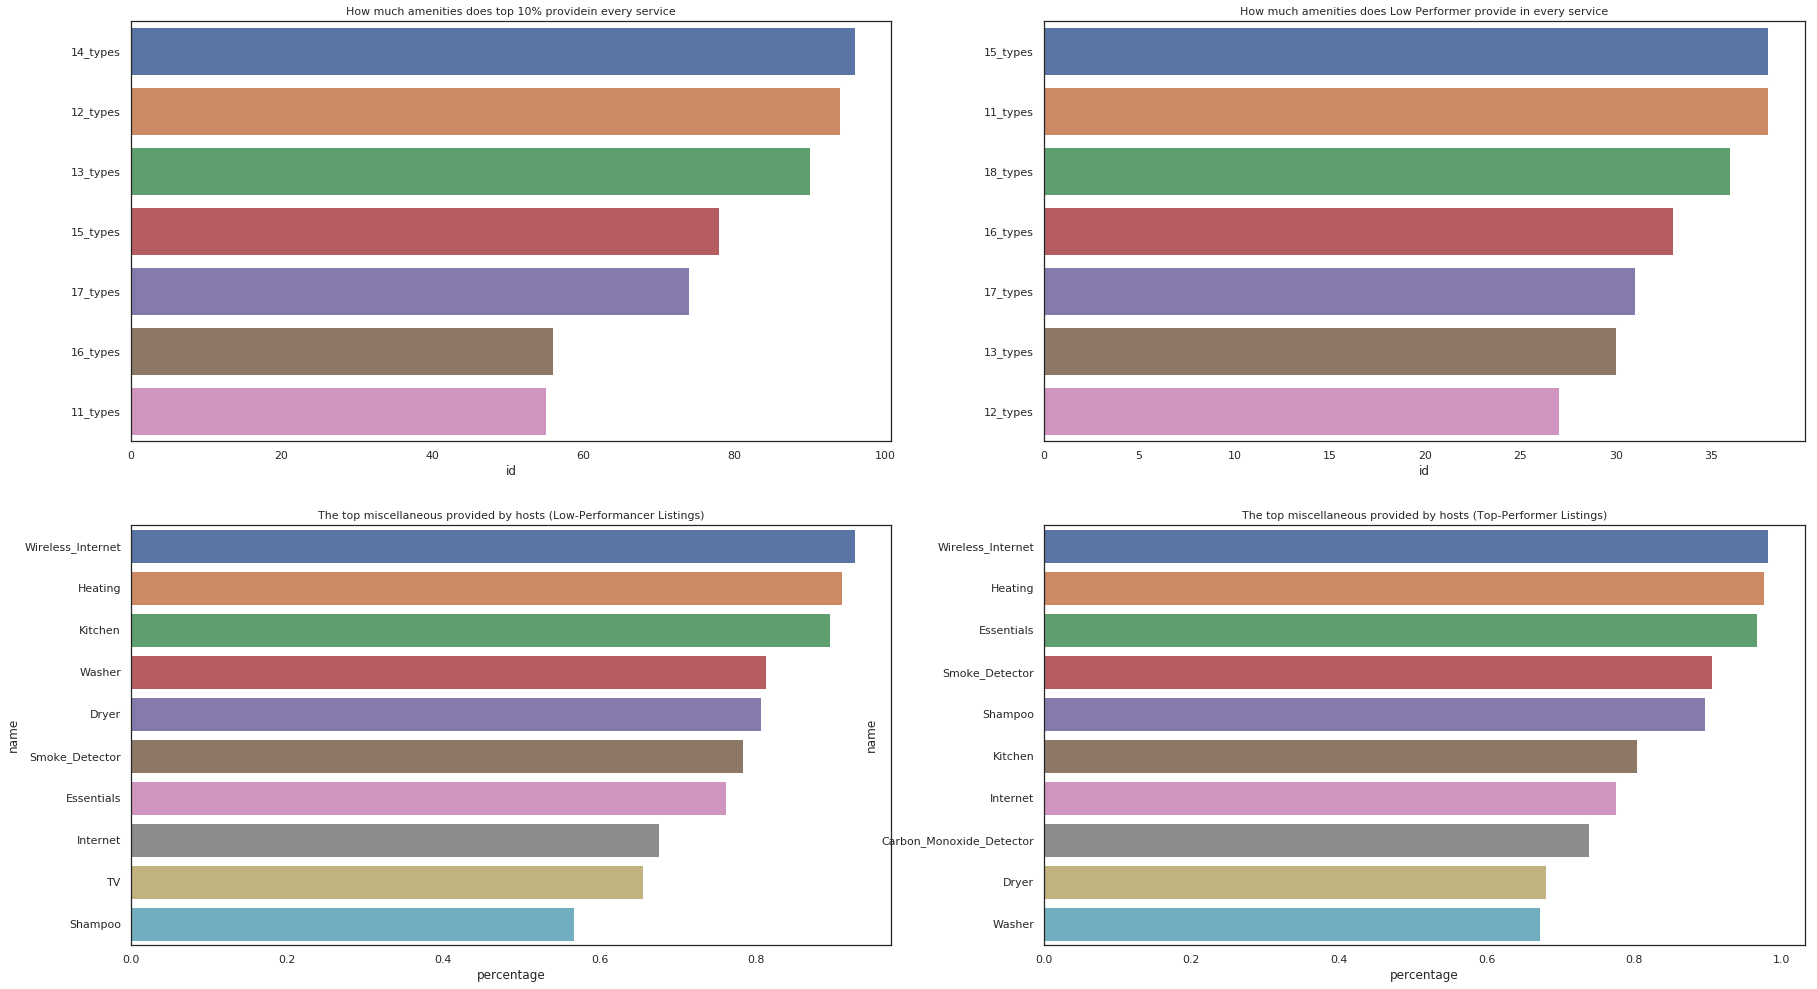

In [101]:
### Visualization
fig, ax = plt.subplots(figsize=(30, 17), nrows=2, ncols=2)
sns.barplot(y=viz2.index.astype(str) + '_types', x=viz2['id'], ax=ax[0][0]).set_title('How much amenities does top 10% providein every service', fontsize=11)
sns.barplot(y=viz1.index.astype(str) + '_types', x=viz1['id'], ax=ax[0][1]).set_title('How much amenities does Low Performer provide in every service', fontsize=11)
sns.barplot(y=viz4.index,x=viz4["percentage"], ax=ax[1][0]).set_title('The top miscellaneous provided by hosts (Low-Performancer Listings)', fontsize=11)
sns.barplot(y=viz3.index,x=viz3["percentage"], ax=ax[1][1]).set_title('The top miscellaneous provided by hosts (Top-Performer Listings)', fontsize=11)

# Figures Interpretation

Insights of features comparison (from top to bottom):

- Acceptance Rate:
    - TP: Almost all of the top listings always accepts bookings.
    - LP: Almost half of them never really accept the bookings.
- Host Identity Verified:
    - TP: Almost 90% of the host’s listings has been identified by Airbnb.
    - LP: 38% of host’s listings hasn't been identified by Airbnb.
- Superhost:
    - TP: 40% Top listings have Superhost Predicate.
    - LP: Most of the low performers are not superhosts.
- Instant Booking Feature:
    - TP: Eventhough, have big contribution on the score most of the top listings don’t activate their instant_booking by ~62%
    - LP: More than 90% they turn off the instant bookable.
- Respond Time:
    - TP: ~78% of top listings’ hosts always response conversations immediately.
    - LP: Many of host of low performer listings respond the conversation longer than top-performer listings.
- Respond the Conversations:
    - TP: Most of the top listings in Seattle always response conversations.
    - LP: A lot of low performer never response the conversation.

- Amenities:
    - TP & LP: They serve assorted miscellaneous in the top listings; most of them provide wireless internet, heating, essentials, smoke detector, shampoo, etc. There are not much difference between low performer and top performer listings about the amenities.

※ TP: topperformer | LP: lowperformer

# Suggestions for Hosts

Therefore, to conclude the analysis there are several points that low-performer could do to increase their probability to get more bookings, reviews, and higher number of reviews;

1. Increase the acceptance rate of the rental. Top performer almost never reject the orders, not like low performers around 45% of the listings that did not accept any bookings. Although we do not know the reason why the hosts did not accept the orders;

2. Be responsive most of the top performer hosts always giving response within an hour about 80% of all the time.
3. Be a superhost. It’s the status and the recognition from the Airbnb because they provide amazing experience and great example for other hosts.
4. Always response the conversations. More responsive the hosts, more better the score it would be. Top performers always response to every conversation.
5. Activate the instant bookable features; They give better experience to the future guests.
6. Make your account verified by Airbnb. Many of low performer accounts have not verified by Airbnb more than the high performer by 25%.

Future development plan: This new comprehensive recommendations feature, could be attached in every page of User Interface that have Informations about those variables, notifications, or other forms of reminders to the eligible hosts. Hosts that subscribe this feature could be charge in reasonable price.!